In [21]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("bikes_rent.csv")
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


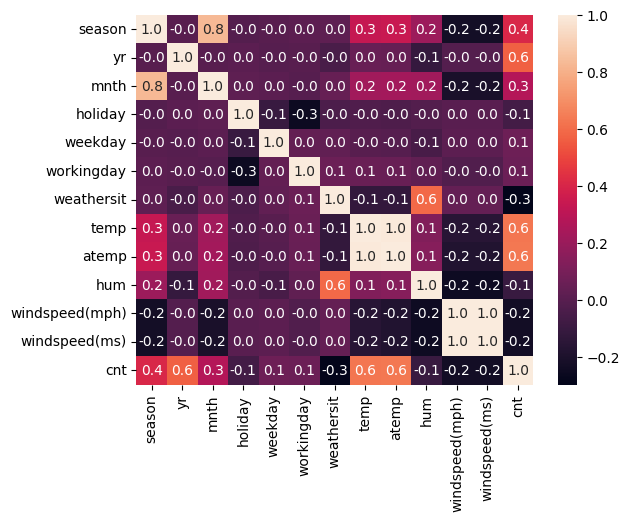

In [6]:
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True, fmt=".1f")
plt.show()

In [9]:
df = df.drop(["atemp", "windspeed(mph)"], axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,4.805490,985
1,1,0,1,0,0,0,2,14.902598,69.6087,7.443949,801
2,1,0,1,0,1,1,1,8.050924,43.7273,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,65.2917,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,59.0000,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,75.2917,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,48.3333,10.505372,1796


In [31]:
X_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms)
196,3,0,7,0,6,0,1,28.153347,58.5000,6.240015
187,3,0,7,0,4,1,1,30.750000,65.1250,4.768172
14,1,0,1,0,6,0,2,9.566653,49.8750,4.731122
31,1,0,2,0,2,1,2,7.879134,82.9565,1.593773
390,1,1,1,0,4,1,2,14.008347,76.9583,2.198265
...,...,...,...,...,...,...,...,...,...,...
566,3,1,7,0,5,1,2,27.299153,84.4167,6.258734
688,4,1,11,0,1,1,2,15.614153,62.3333,7.040451
266,4,0,9,0,6,0,2,24.873347,86.2500,2.347645
504,2,1,5,0,6,0,1,24.600000,45.6250,2.515121


In [30]:
model.predict(X_test)

array([4882.51462722, 4663.5400082 , 1363.49444444,  963.02594086,
       3850.8749616 , 2597.74      , 4335.47347168, 6493.59581322,
       5842.73235294,  716.16488095, 1503.40636464, 1847.65895313,
       1860.02041542, 4831.79471485, 4706.9843832 , 4499.49354433,
       7320.04925814, 5999.12337026, 3322.11281874, 2377.06952381,
       7376.04786869, 1892.565338  , 5166.97190221, 4602.34489083,
       1453.1625    , 7068.55584664, 3971.17756332, 4914.0168163 ,
       7220.71475814, 7303.71973128, 1121.91242424, 4762.31927625,
       5735.87691266, 4930.26679601, 2375.78404488, 3742.52853303,
       6413.86074591, 6256.95205415, 2270.93391053, 3787.1437671 ,
       6331.24838099, 1744.13073593, 4636.60610255, 3632.95358974,
       7206.88936987, 7220.71475814, 3306.68063259, 4147.58840879,
       1854.86258065, 1981.92669186, 6595.95756151, 6828.9014365 ,
       4914.12714286, 7139.70143635, 4341.54619896, 4300.97680675,
       3551.77805349, 6896.0291786 , 6919.03452057, 2672.00834

In [10]:
df["season"].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [11]:
df["yr"].value_counts()

1    366
0    365
Name: yr, dtype: int64

In [12]:
df["weathersit"].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

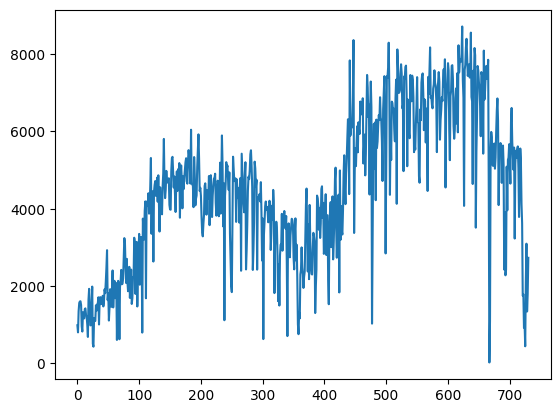

In [13]:
plt.plot(df["cnt"])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("cnt", axis=1), df["cnt"], random_state=0, test_size=0.2)

In [17]:
params = {
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 10, 150],
}

model = RandomForestRegressor()
model = GridSearchCV(model, params, scoring="neg_mean_absolute_error")

In [18]:
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 10, 150]},
             scoring='neg_mean_absolute_error')

In [19]:
model.best_estimator_

RandomForestRegressor(max_depth=7, n_estimators=10)

In [20]:
model.best_score_

-499.21501183167663

In [23]:
mean_absolute_error(y_train, model.predict(X_train)), mean_absolute_error(y_test, model.predict(X_test))

(301.5475802845325, 517.5980924953127)

In [25]:
from joblib import dump, load
dump(model.best_estimator_, 'model.joblib')

['model.joblib']

In [27]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.7.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.4.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
audioread==3.0.0
autograd==1.6.1
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cached-property==1.5.2
cachetools==5.3.1
catalogue==2.0.8
certifi==2023.5.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.6
contextlib2==0.6.0.post1
contourpy==1.1.0
convertdate==2.4.0
cufflinks==0.17.3
cvxopt==1.3.1
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.35
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-p